<a href="https://colab.research.google.com/github/IamDragon/Artificial-intelligence-for-data-science-/blob/main/Lab3/lab3_dimention_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dimention Reduction**

<font color='#FF15D'> **Task1:**


Use **PCA** to reduce the dataset to 3 dimensions and visualize the results.

Steps:

Standardize the dataset (excluding the Character column).

Apply PCA with n_components=3.

Create a 3D scatter plot of the transformed data.

Add labels (character names) to each point in the plot.

<font color='#FF15D'>**Task2:**


Re-use the same dataset, but this time apply **t-SNE** for dimensionality reduction and visualization.

Steps:

Standardize the dataset (exclude the Character column).

Apply t-SNE with n_components=2 (or 3).

Create a scatter plot of the transformed data.

Label each point with the character name.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Data
data = {
    'Character': ['ShadowFang', 'IronTusk', 'Arcana', 'ThunderBlaze', 'PhantomStrike', 'BruteHammer'],
    'Speed' : [8,3,4,6,7,2],
    'Strength' : [7,9,2,6,4,10],
    'Defense' : [5,8,3,6,4,9],
    'Magic' : [2,1,9,3,4,1],
    'Range' : [6,4,8,5,9,3],
    'Agility' : [9,2,5,6,8,1]
}
df = pd.DataFrame(data)
df.head()

,Character,Speed,Strength,Defense,Magic,Range,Agility
0,ShadowFang,8,7,5,2,6,9
1,IronTusk,3,9,8,1,4,2
2,Arcana,4,2,3,9,8,5
3,ThunderBlaze,6,6,6,3,5,6
4,PhantomStrike,7,4,4,4,9,8


In [ ]:
df_noChar = df.drop('Character', axis=1)
scaled_data = StandardScaler().fit_transform(df_noChar)


df_scaled = pd.DataFrame(scaled_data,columns=df_noChar.columns)
df_scaled.head()

,Speed,Strength,Defense,Magic,Range,Agility
0,1.38873,0.242536,-0.394055,-0.485071,0.078811,1.316976
1,-0.92582,0.970143,1.024544,-0.848875,-0.866921,-1.087937
2,-0.46291,-1.576482,-1.339788,2.061553,1.024544,-0.057260
3,0.46291,-0.121268,0.078811,-0.121268,-0.394055,0.286299
4,0.92582,-0.848875,-0.866921,0.242536,1.497410,0.973417


In [ ]:
pca = PCA(n_components=3)

x = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(data=x, columns=['PC1', 'PC2', 'PC3'])
pca_df['Character'] = df['Character']
pca_df.head()

,PC1,PC2,PC3,Character
0,-0.901859,1.787990,-0.265045,ShadowFang
1,2.323986,-0.218862,0.212348,IronTusk
2,-2.347454,-2.058233,-0.211582,Arcana
3,-0.058673,0.488568,-0.420936,ThunderBlaze
4,-2.218756,0.494975,0.636073,PhantomStrike


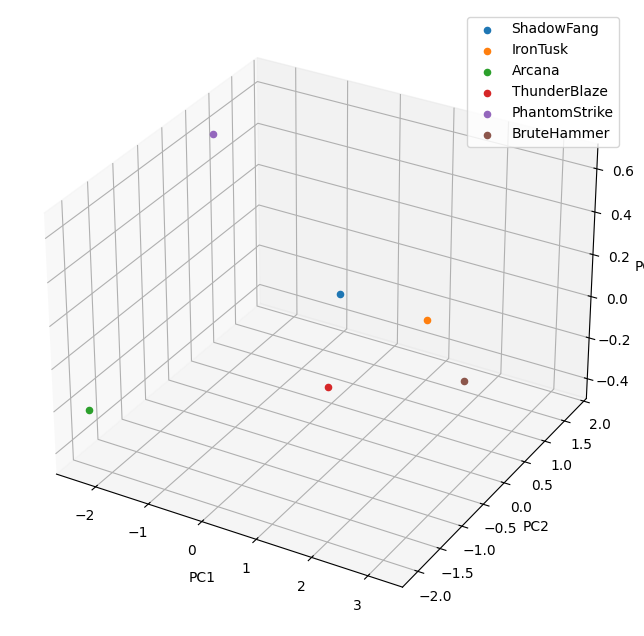

In [ ]:


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for character in pca_df['Character'].unique():
    character_data = pca_df[pca_df['Character'] == character]
    ax.scatter(character_data['PC1'], character_data['PC2'], character_data['PC3'], label=character)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax.legend()
plt.show()

In [ ]:
df_noChar = df.drop('Character', axis=1)
scaled_data = StandardScaler().fit_transform(df_noChar)


df_scaled = pd.DataFrame(scaled_data,columns=df_noChar.columns)
df_scaled.head()

,Speed,Strength,Defense,Magic,Range,Agility
0,1.38873,0.242536,-0.394055,-0.485071,0.078811,1.316976
1,-0.92582,0.970143,1.024544,-0.848875,-0.866921,-1.087937
2,-0.46291,-1.576482,-1.339788,2.061553,1.024544,-0.057260
3,0.46291,-0.121268,0.078811,-0.121268,-0.394055,0.286299
4,0.92582,-0.848875,-0.866921,0.242536,1.497410,0.973417


In [ ]:
tsne = TSNE(n_components=2, perplexity=5)
x = tsne.fit_transform(df_scaled)

tsne_df = pd.DataFrame(data=x, columns=['TSNE1', 'TSNE2'])
tsne_df['Character'] = df['Character']
tsne_df.head()

,TSNE1,TSNE2,Character
0,-10.769049,-15.163011,ShadowFang
1,1.296945,48.545216,IronTusk
2,53.607193,-6.947335,Arcana
3,16.835173,-73.713432,ThunderBlaze
4,-67.591187,16.007120,PhantomStrike


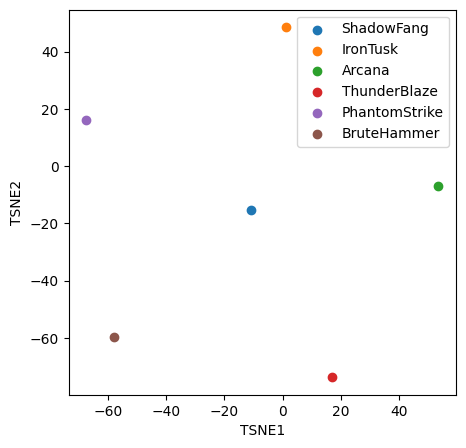

In [ ]:

plt.figure(figsize=(5, 5))
for character in tsne_df['Character'].unique():
    character_data = tsne_df[tsne_df['Character'] == character]
    plt.scatter(character_data['TSNE1'], character_data['TSNE2'], label=character)

plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.legend()
plt.show()